In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Load data

In [2]:
df = pd.read_csv('..\init\data\Data_FSKU.csv')
df.head()

Ngày  Mã chi nhánh     Khu vực         Tên Chi Nhánh  \
0  2023-02-01 00:00:00             1  MIỀN TRUNG  Chi nhánh Đà Nẵng UN   
1  2023-02-01 00:00:00             1  MIỀN TRUNG  Chi nhánh Đà Nẵng UN   
2  2023-02-01 00:00:00             1  MIỀN TRUNG  Chi nhánh Đà Nẵng UN   
3  2023-02-01 00:00:00             1  MIỀN TRUNG  Chi nhánh Đà Nẵng UN   
4  2023-02-01 00:00:00             1  MIỀN TRUNG  Chi nhánh Đà Nẵng UN   

  Mã khách hàng               Mã hàng Mã nhóm bán hàng  \
0       KH07781   14.L1.3060.A36410.7        14.A36410   
1       KH08137  25.L1.6060.GHP6004.3       25.GHP6004   
2       KH02768     10.L1.3060.4601.8          10.4601   
3       KH02768    14.L1.4080.48922.1         14.48922   
4       KH08179  25.L1.3060.GT3602.50        25.GT3602   

                    F_SKU Phân loại                      Tên hàng  \
0      36410-36310D-36310      F_Bộ   Gạch 30x60 MS A36410 Loại 1   
1    Solo6060.GraniteBóng    F_Solo  Gạch 60x60 MS GHP6004 loại 1   
2          4601-4602-4603      F_Bộ     Gạch 30x60 MS 4601 Loại 1   
3  48822 - 48922D - 48922      F_Bộ    Gạch 40x80 MS 48922 Loại 1   
4   GT3602-GTD3602-GT3603      F_Bộ   Gạch 30x60 MS GT3602 Loại 1   

  Mã quy cách (kích thước)  Số lượng  Số m2 Đơn vị  
0                     3060       168  30.24   Viên  
1                     6060         2   0.72   Viên  
2                     3060         8   1.44   Viên  
3                    4080A        16   5.12   Viên  
4                     3060        68  12.24   Viên

In [3]:
df.isnull().sum()

Ngày                        0
Mã chi nhánh                0
Khu vực                     0
Tên Chi Nhánh               0
Mã khách hàng               0
Mã hàng                     0
Mã nhóm bán hàng            0
F_SKU                       0
Phân loại                   0
Tên hàng                    0
Mã quy cách (kích thước)    0
Số lượng                    0
Số m2                       0
Đơn vị                      0
dtype: int64

## Process

### Rename

In [4]:
# Đổi tên cột sang tiếng Anh
df = df.rename(columns={
    "Ngày": "date",
    "Mã chi nhánh": "branch_code",
    "Khu vực": "region",
    "Tên Chi Nhánh": "branch_name",
    "Mã khách hàng": "customer_code",
    "Mã hàng": "product_code",
    "Mã nhóm bán hàng": "sales_group_code",
    "F_SKU": "f_sku",
    "Phân loại": "category",
    "Tên hàng": "product_name",
    "Mã quy cách (kích thước)": "spec_code_size",
    "Số lượng": "quantity",
    "Số m2": "square_meters",
    "Đơn vị": "unit"
})
df.head()


date  branch_code      region           branch_name  \
0  2023-02-01 00:00:00            1  MIỀN TRUNG  Chi nhánh Đà Nẵng UN   
1  2023-02-01 00:00:00            1  MIỀN TRUNG  Chi nhánh Đà Nẵng UN   
2  2023-02-01 00:00:00            1  MIỀN TRUNG  Chi nhánh Đà Nẵng UN   
3  2023-02-01 00:00:00            1  MIỀN TRUNG  Chi nhánh Đà Nẵng UN   
4  2023-02-01 00:00:00            1  MIỀN TRUNG  Chi nhánh Đà Nẵng UN   

  customer_code          product_code sales_group_code  \
0       KH07781   14.L1.3060.A36410.7        14.A36410   
1       KH08137  25.L1.6060.GHP6004.3       25.GHP6004   
2       KH02768     10.L1.3060.4601.8          10.4601   
3       KH02768    14.L1.4080.48922.1         14.48922   
4       KH08179  25.L1.3060.GT3602.50        25.GT3602   

                    f_sku category                  product_name  \
0      36410-36310D-36310     F_Bộ   Gạch 30x60 MS A36410 Loại 1   
1    Solo6060.GraniteBóng   F_Solo  Gạch 60x60 MS GHP6004 loại 1   
2          4601-4602-4603     F_Bộ     Gạch 30x60 MS 4601 Loại 1   
3  48822 - 48922D - 48922     F_Bộ    Gạch 40x80 MS 48922 Loại 1   
4   GT3602-GTD3602-GT3603     F_Bộ   Gạch 30x60 MS GT3602 Loại 1   

  spec_code_size  quantity  square_meters  unit  
0           3060       168          30.24  Viên  
1           6060         2           0.72  Viên  
2           3060         8           1.44  Viên  
3          4080A        16           5.12  Viên  
4           3060        68          12.24  Viên

In [5]:
df['date'] = pd.to_datetime(df['date'], format='mixed', dayfirst=True, errors='coerce')

# Kiểm tra kết quả
print(df['date'].head())
print(f"\nKiểu dữ liệu của cột date: {df['date'].dtype}")

0   2023-02-01
1   2023-02-01
2   2023-02-01
3   2023-02-01
4   2023-02-01
Name: date, dtype: datetime64[ns]

Kiểu dữ liệu của cột date: datetime64[ns]


## Explore data

In [6]:
df['date'].isnull().sum()

np.int64(0)

### Sales quantity over time

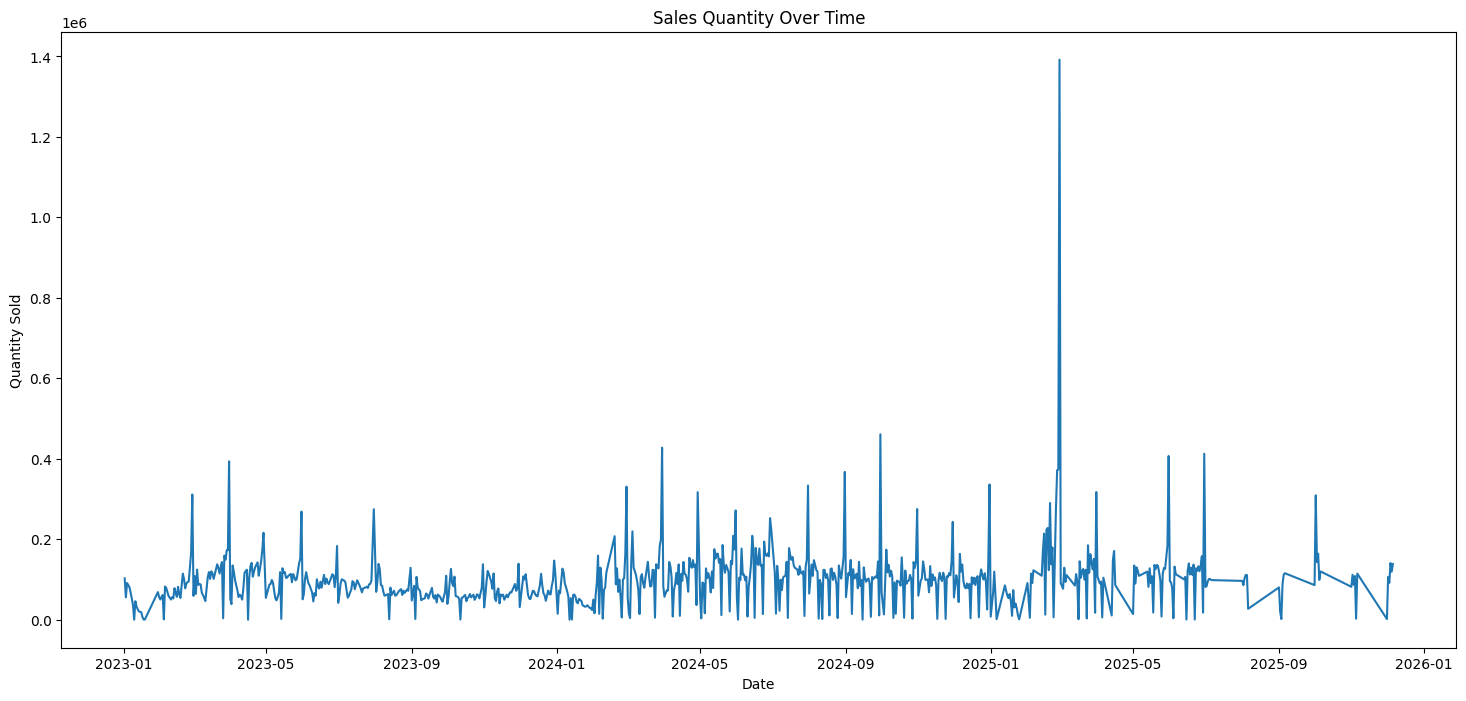

In [8]:
# biểu đồ thời gian số lượng bán hàng theo ngày
plt.figure(figsize=(18, 8))
sales_over_time = df.groupby('date')['quantity'].sum()
plt.plot(sales_over_time.index, sales_over_time.values)
plt.title('Sales Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.show()


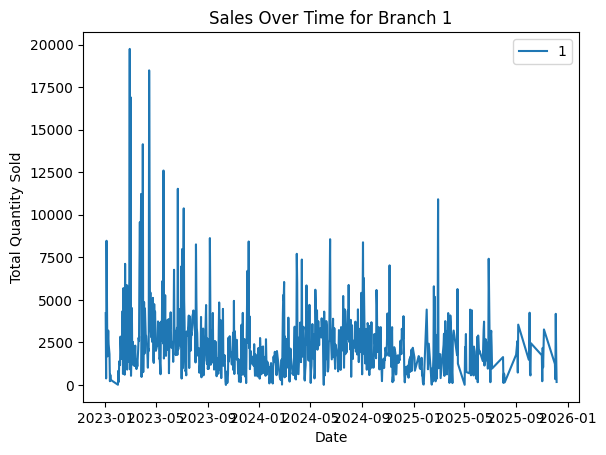

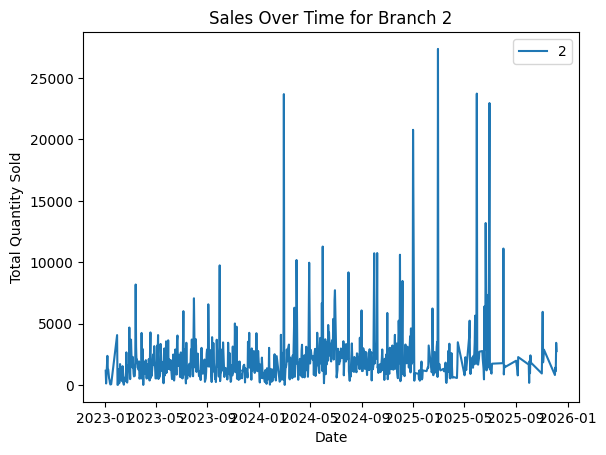

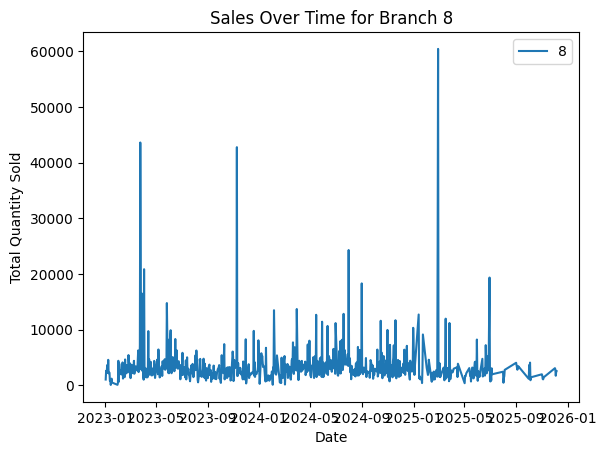

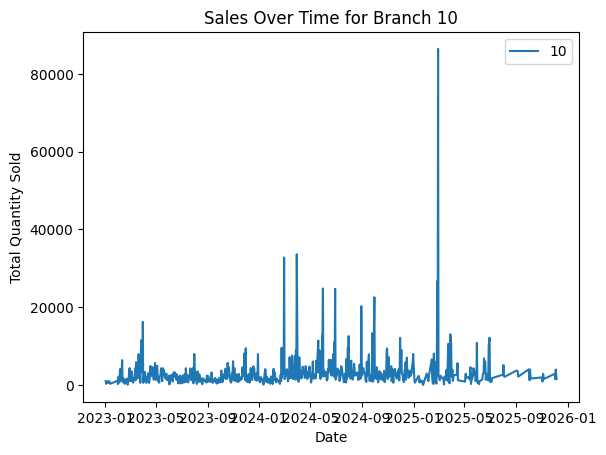

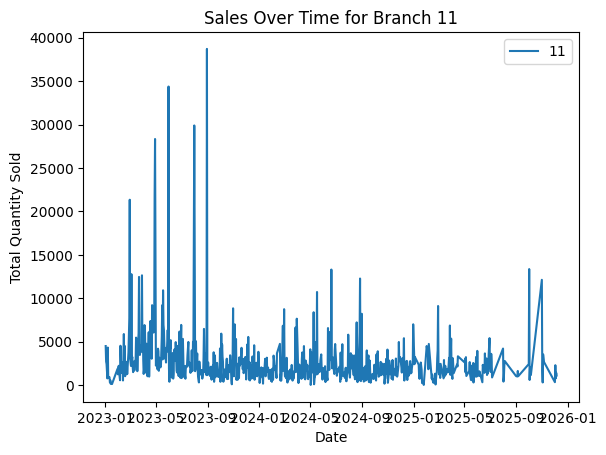

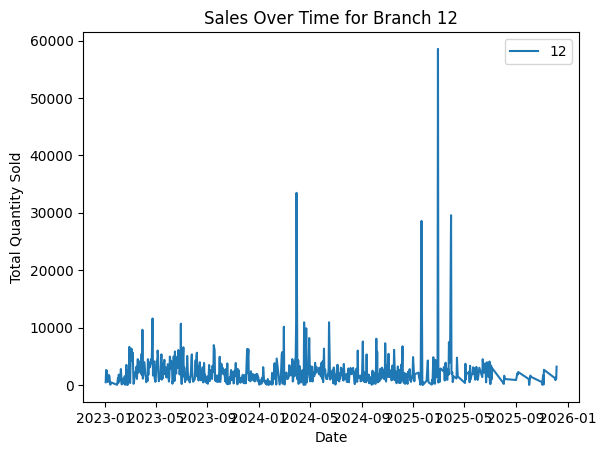

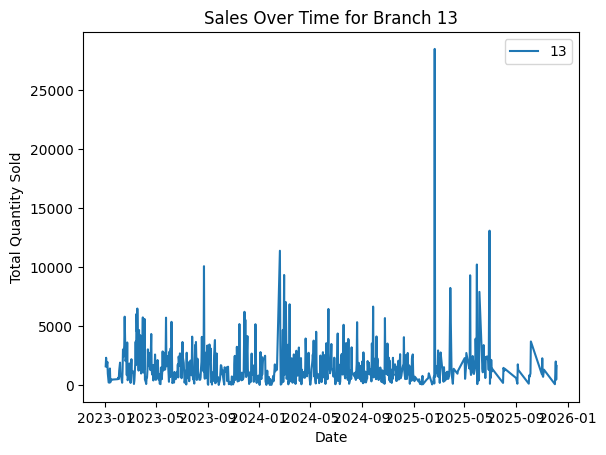

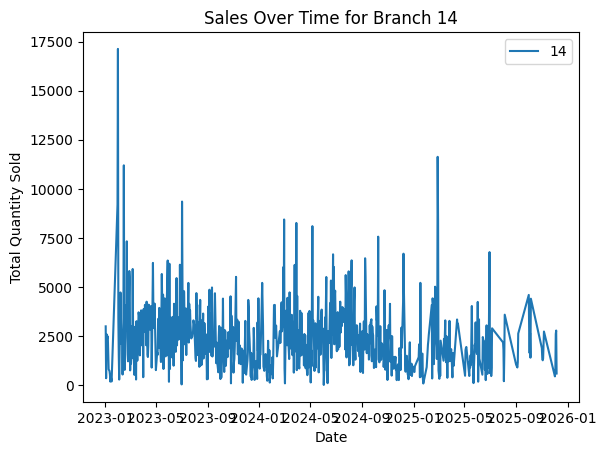

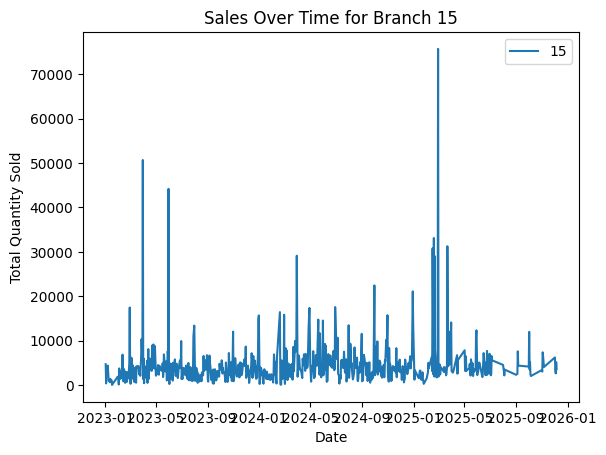

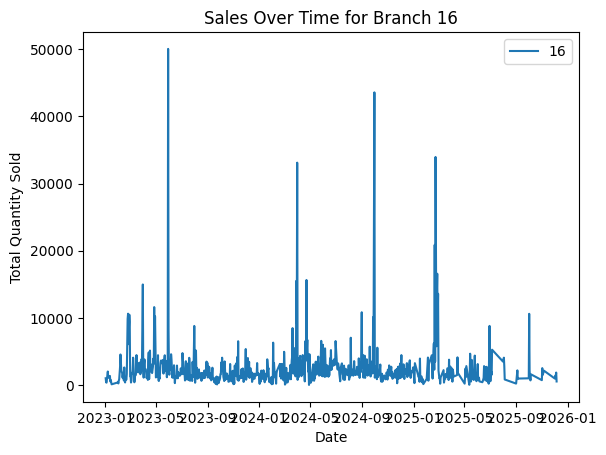

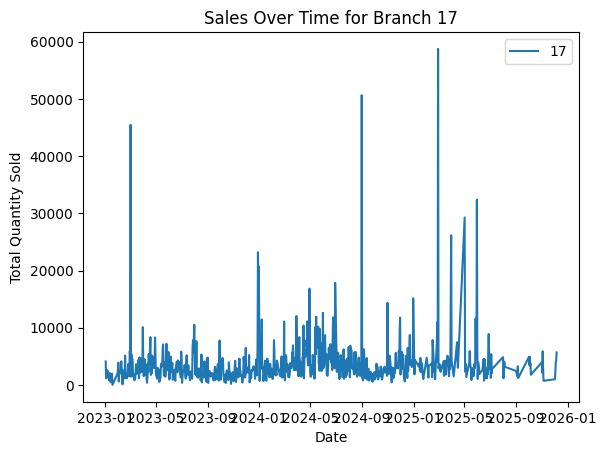

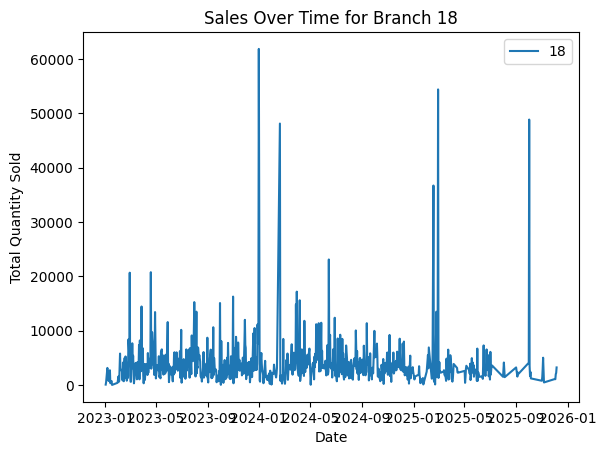

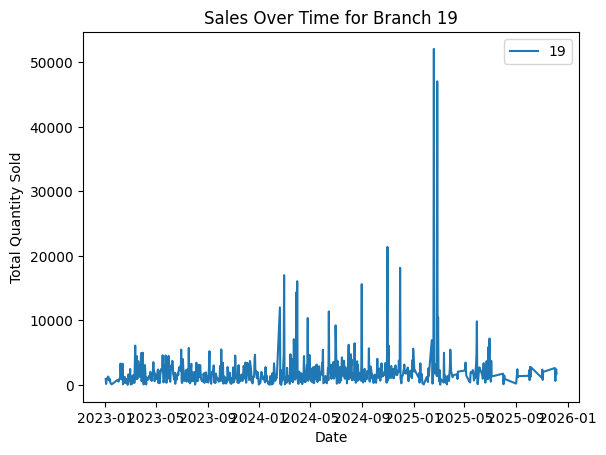

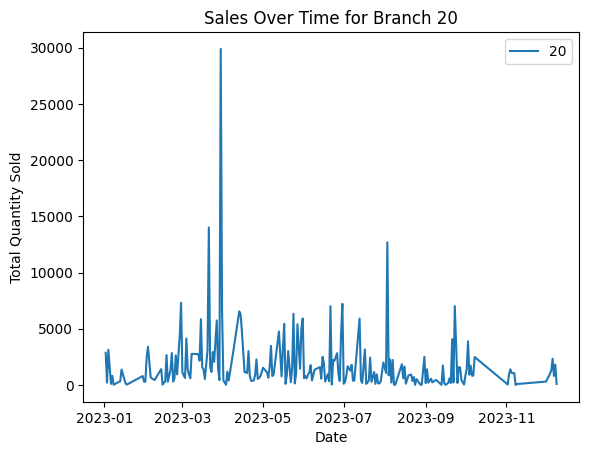

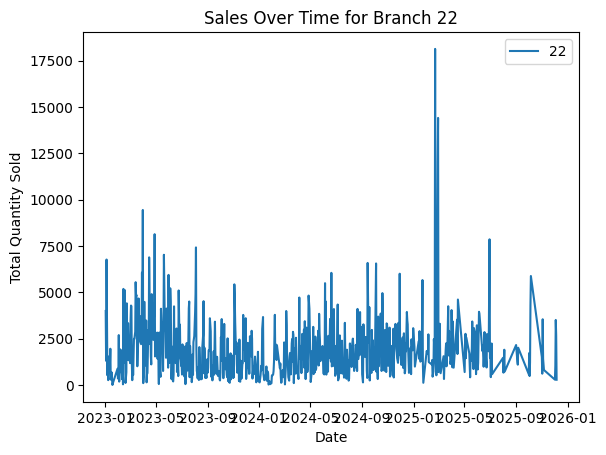

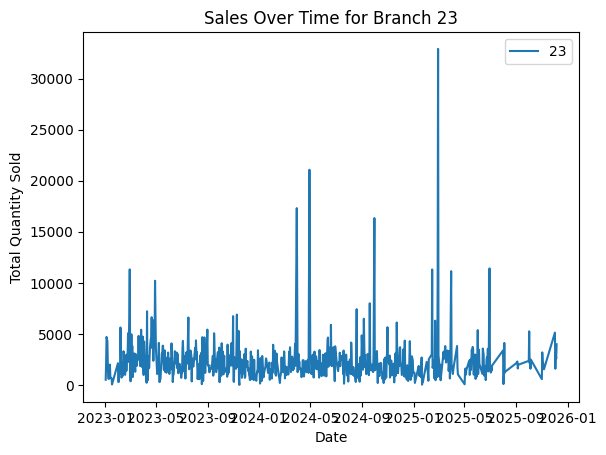

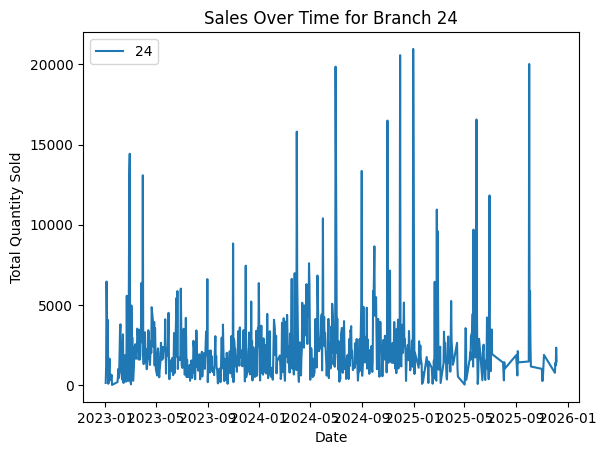

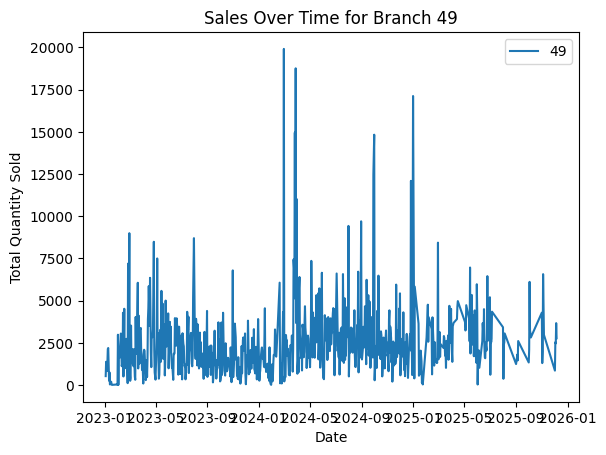

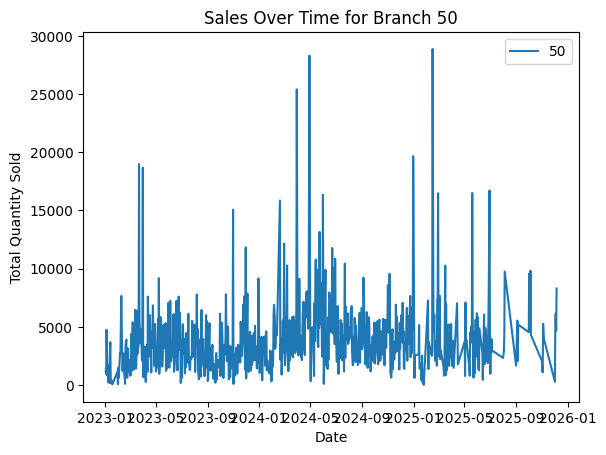

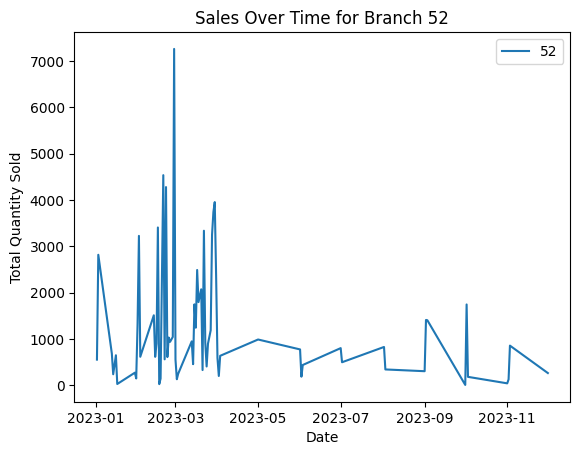

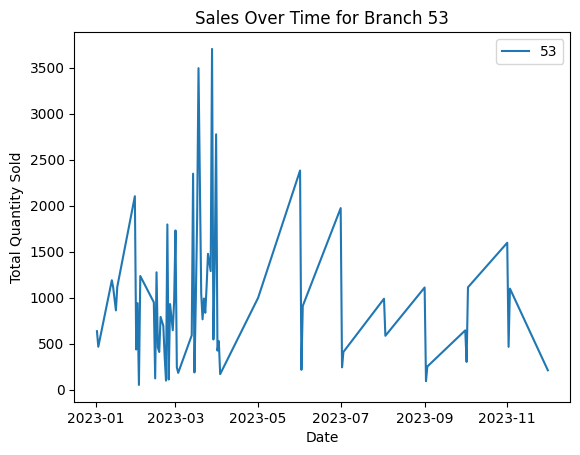

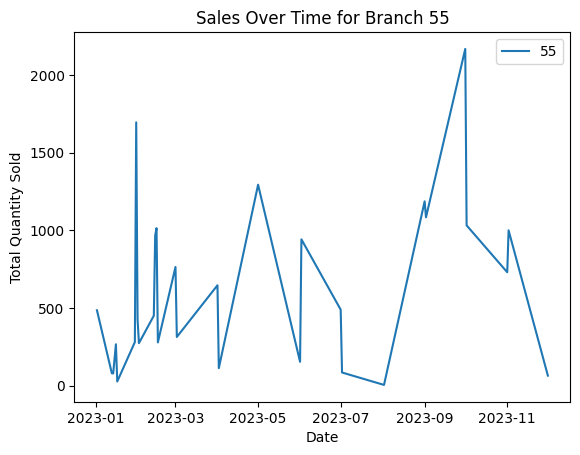

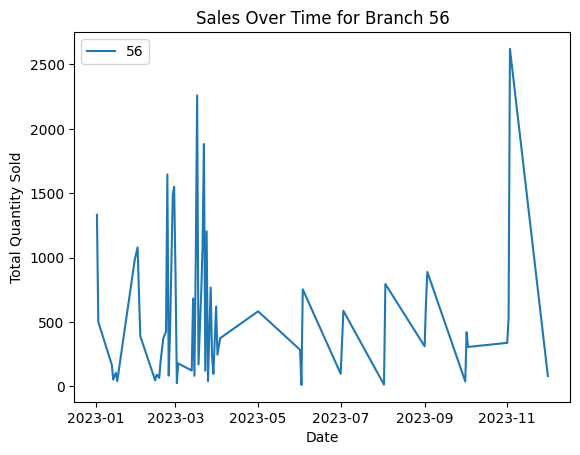

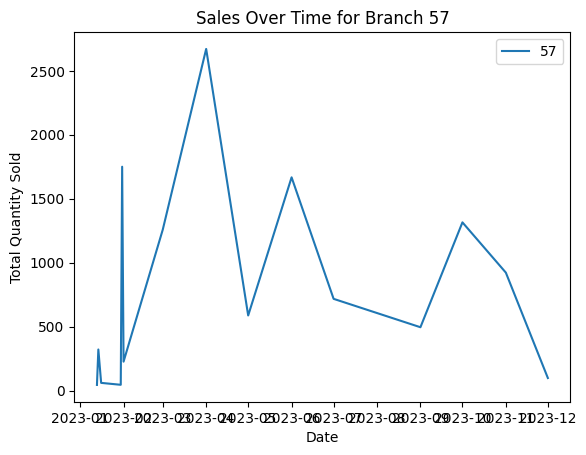

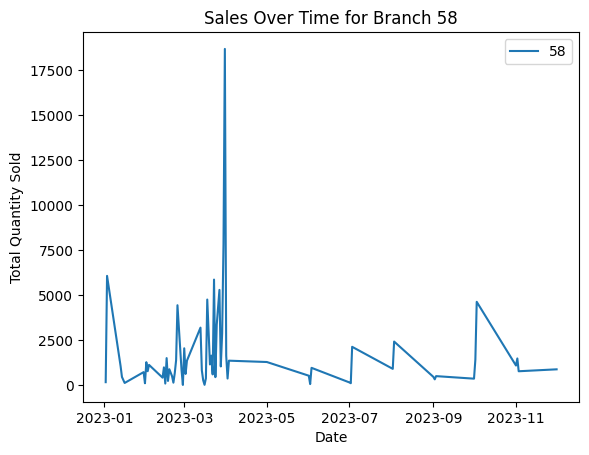

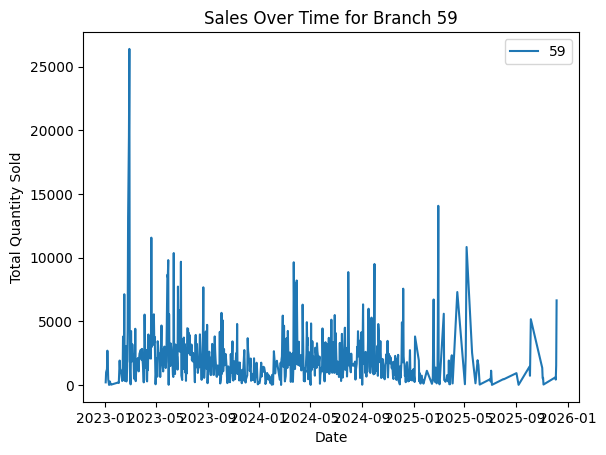

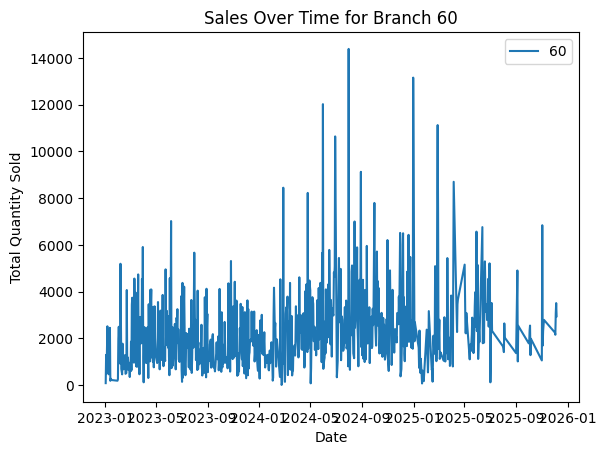

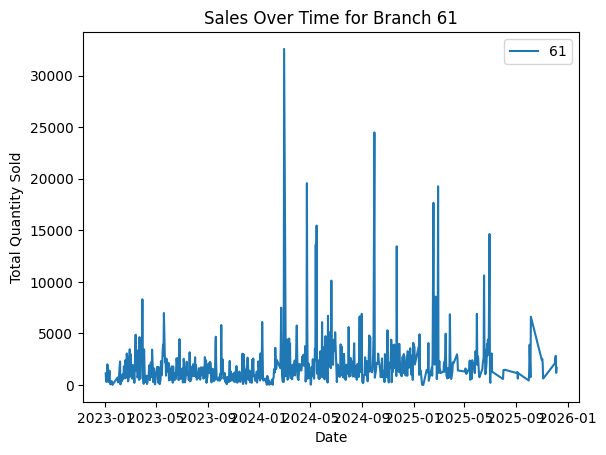

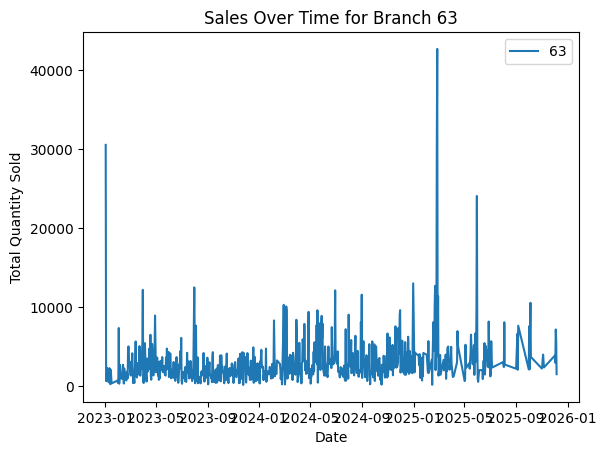

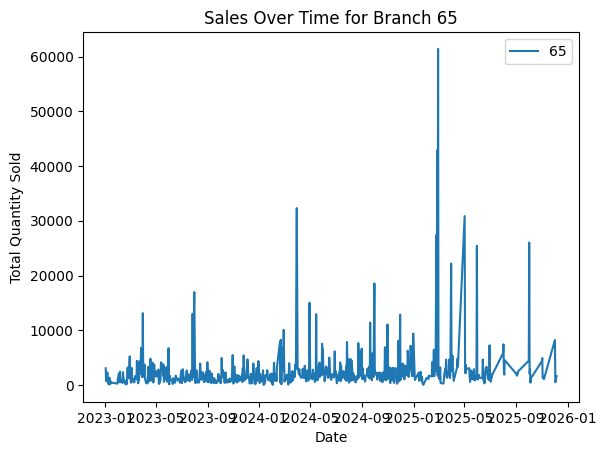

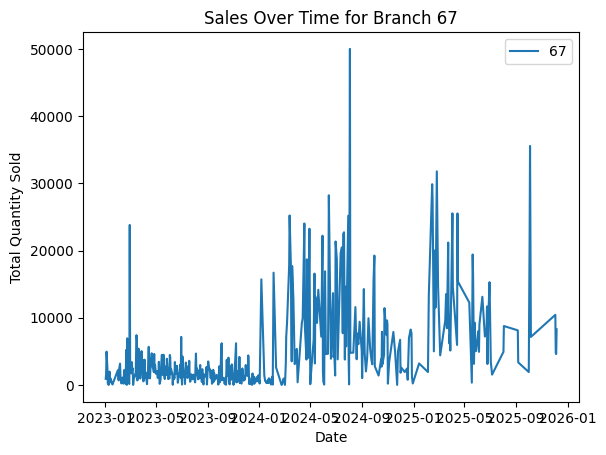

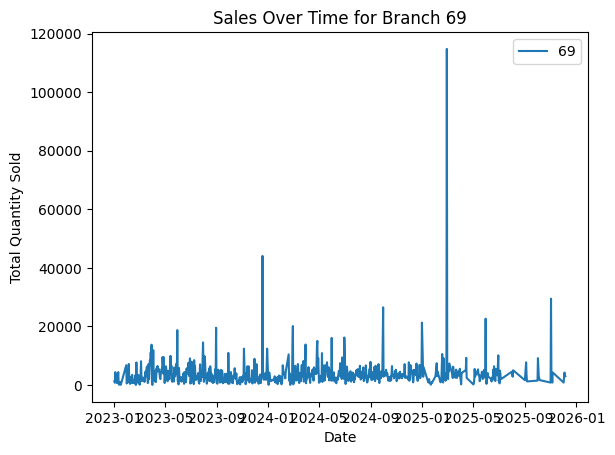

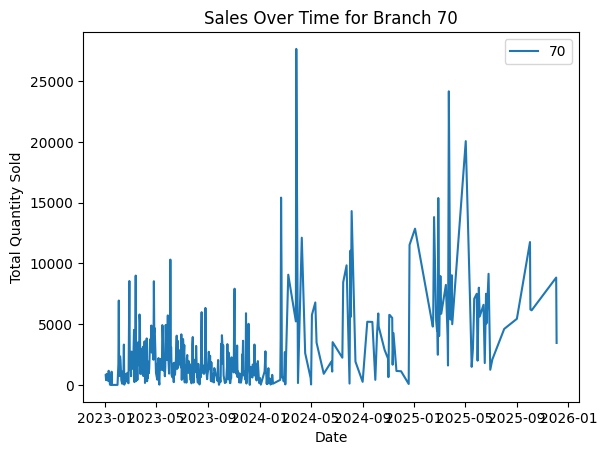

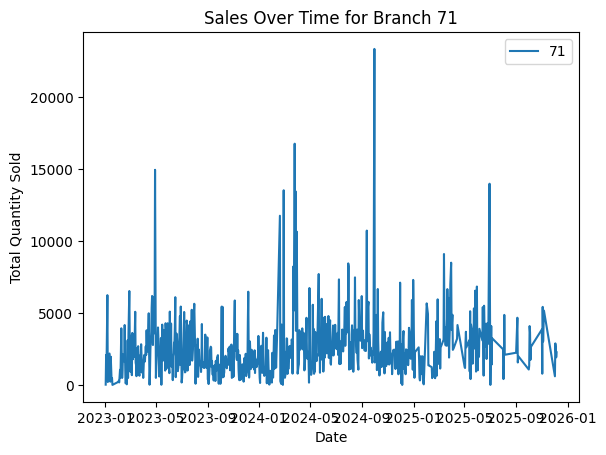

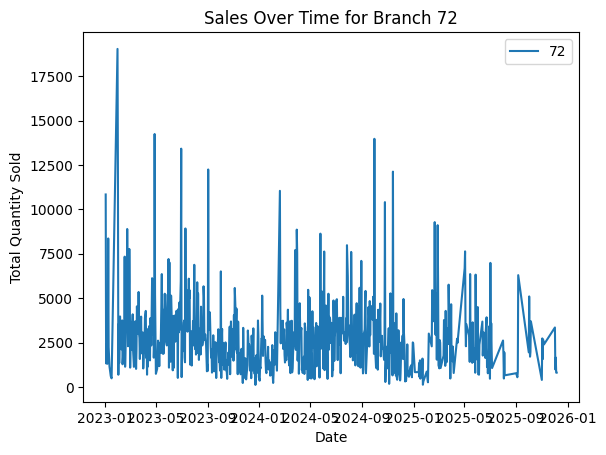

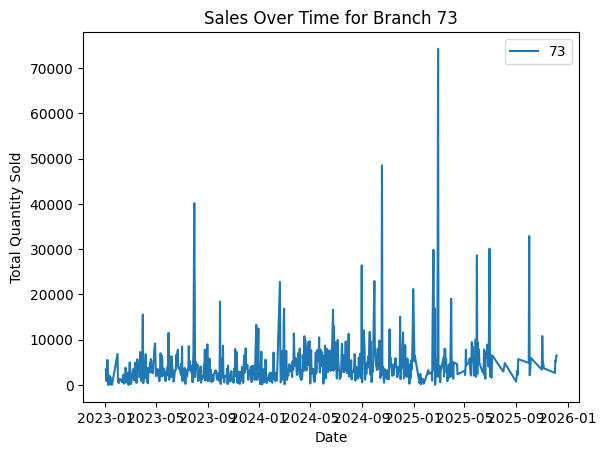

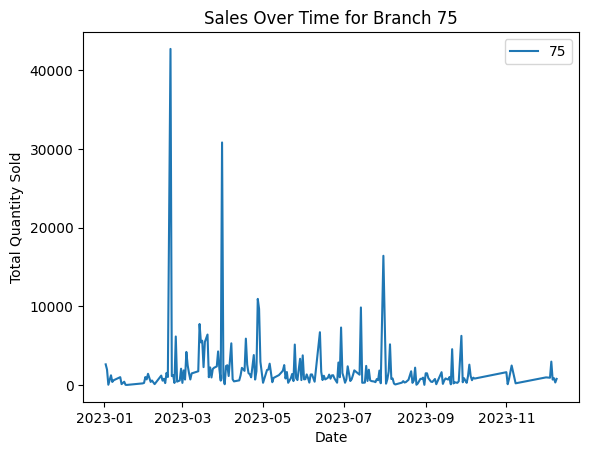

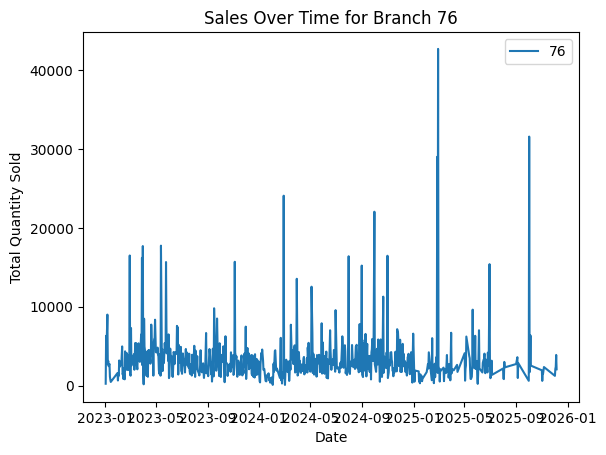

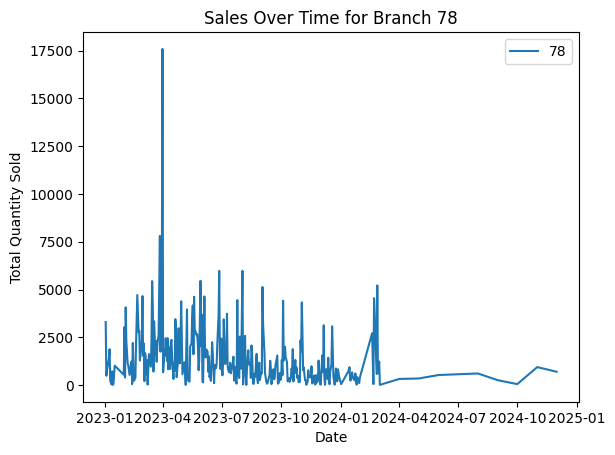

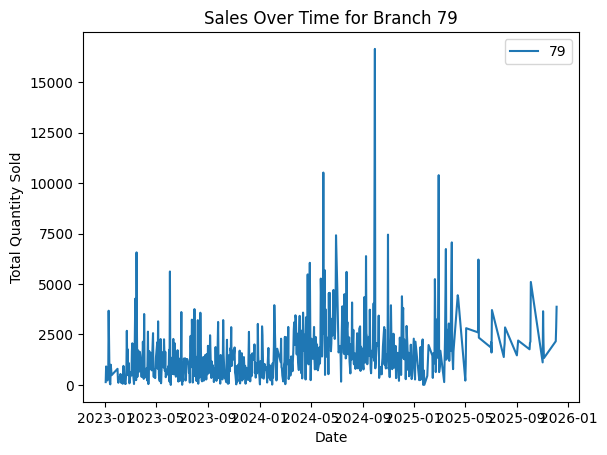

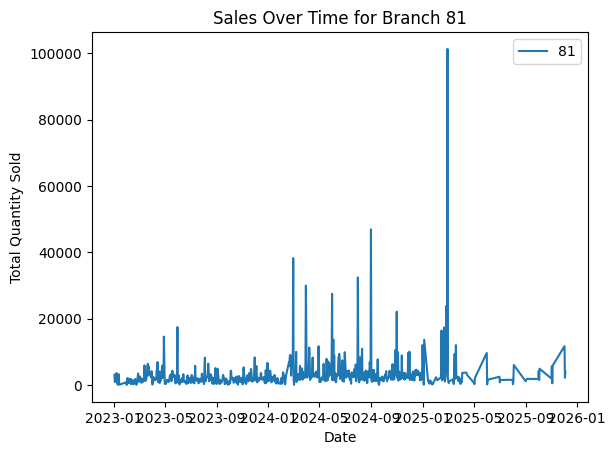

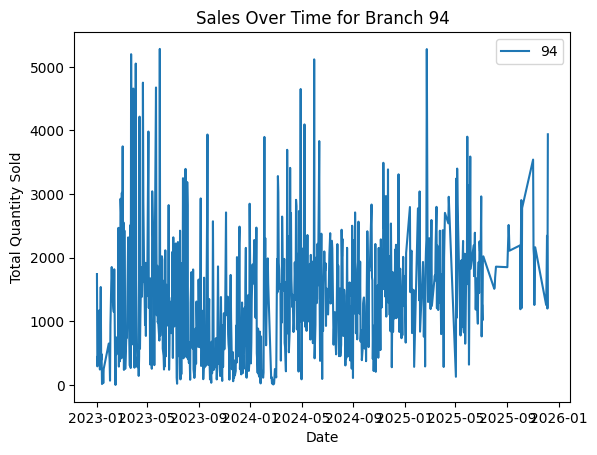

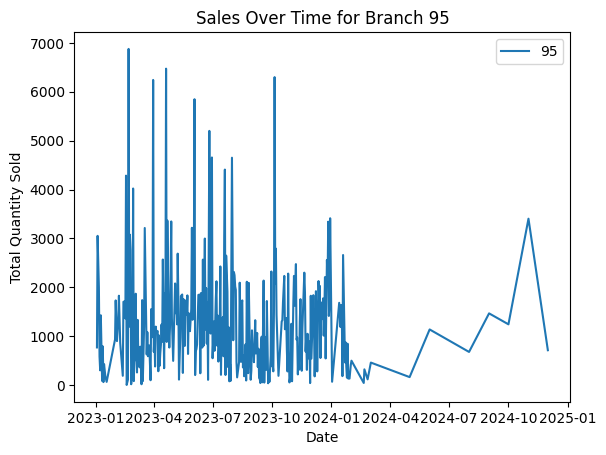

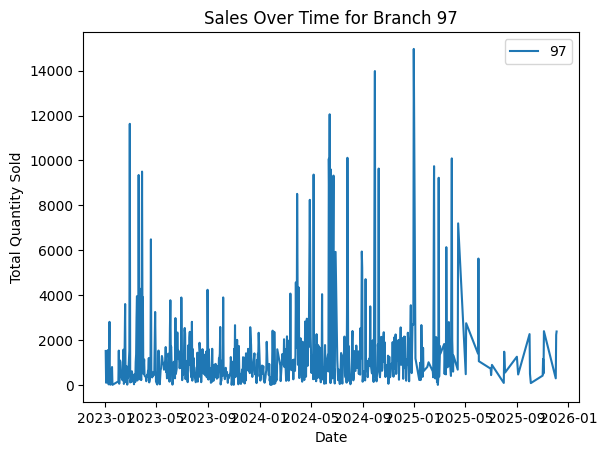

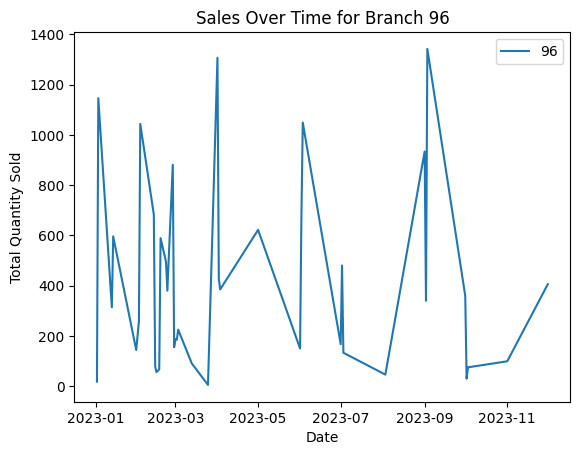

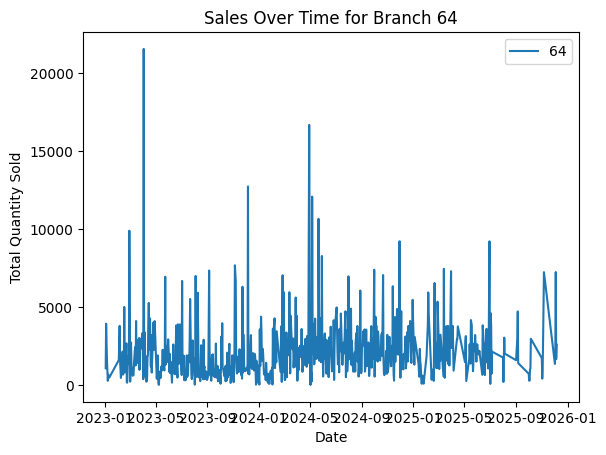

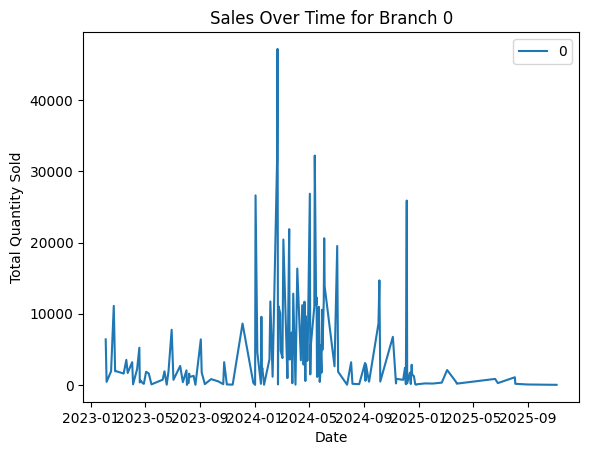

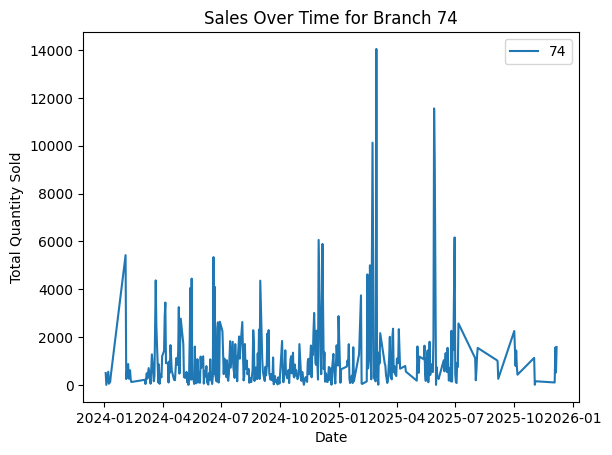

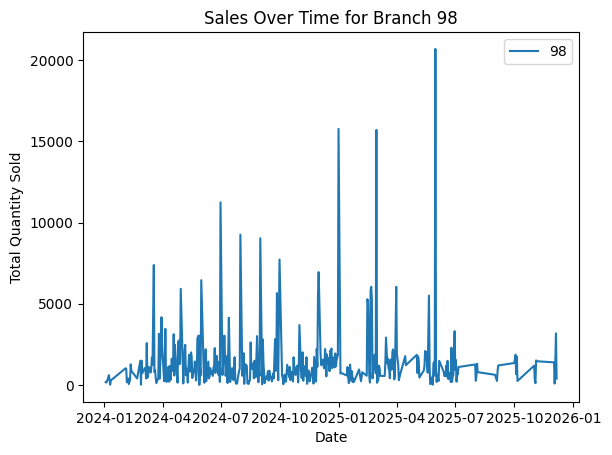

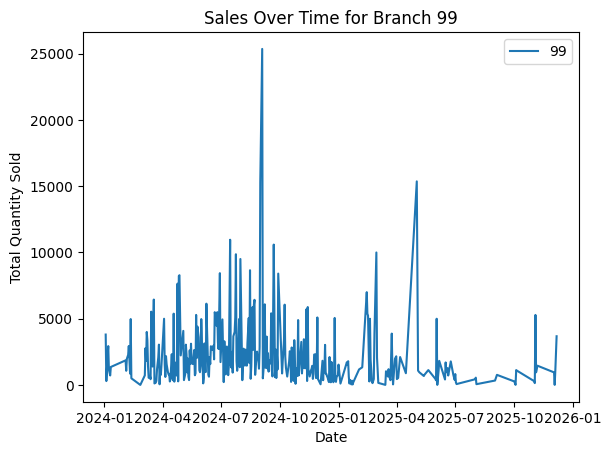

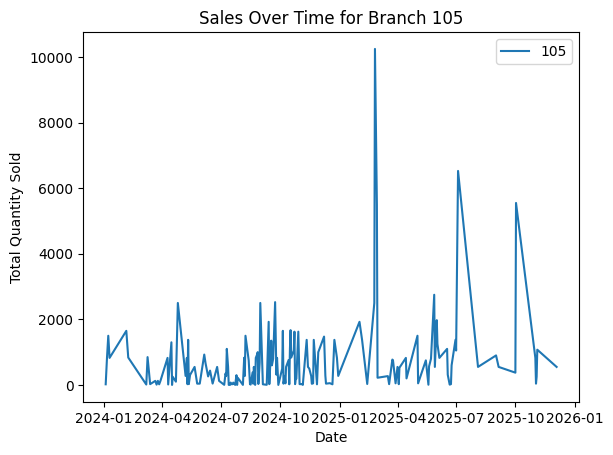

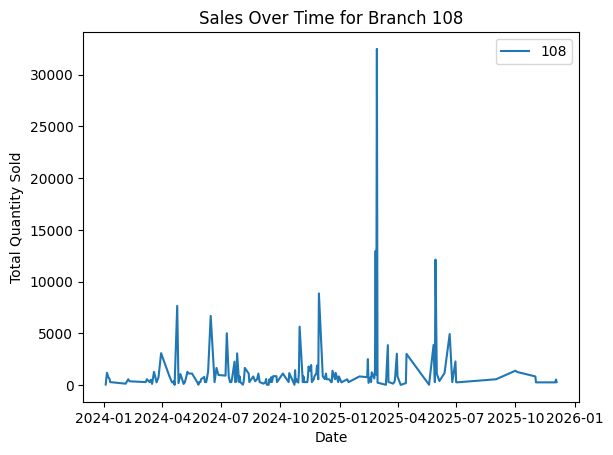

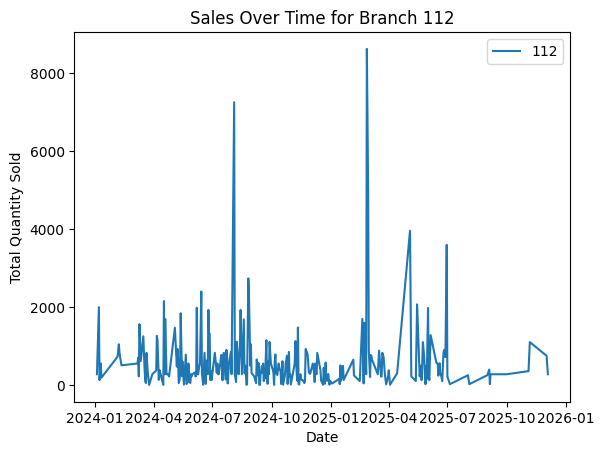

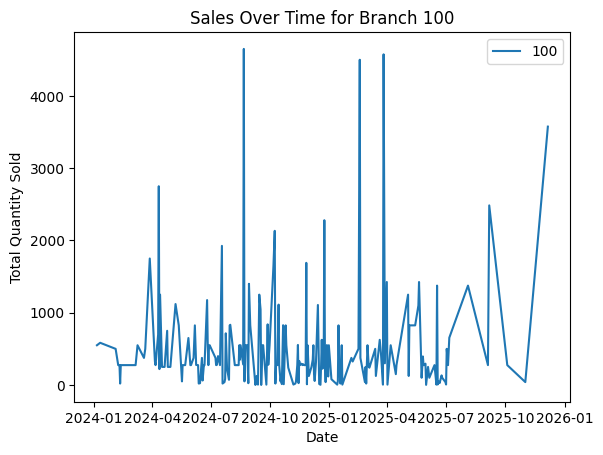

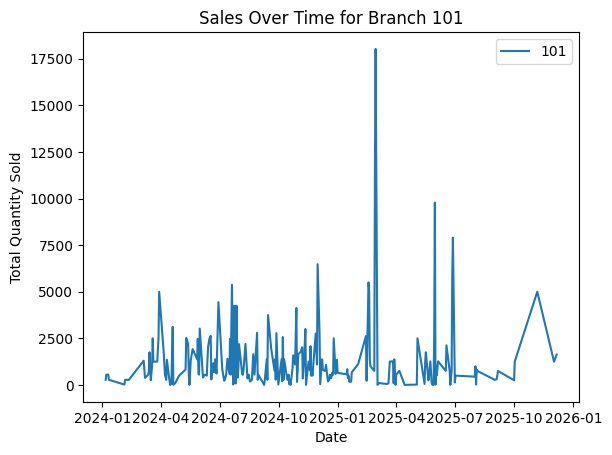

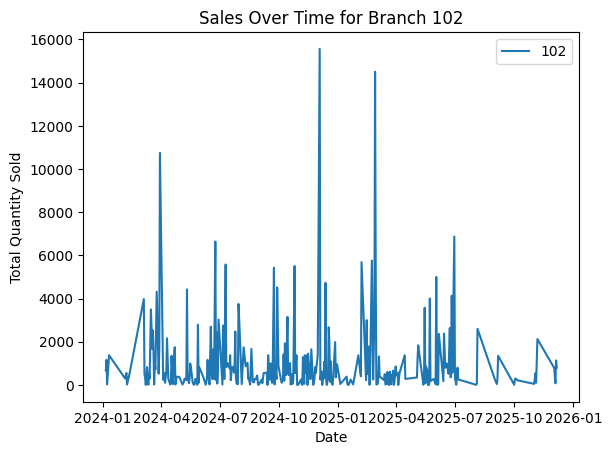

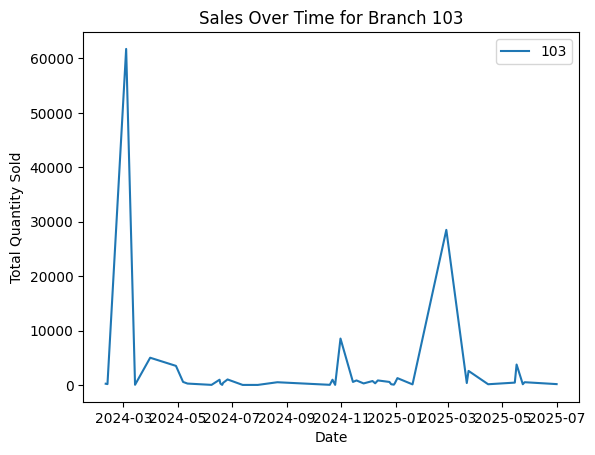

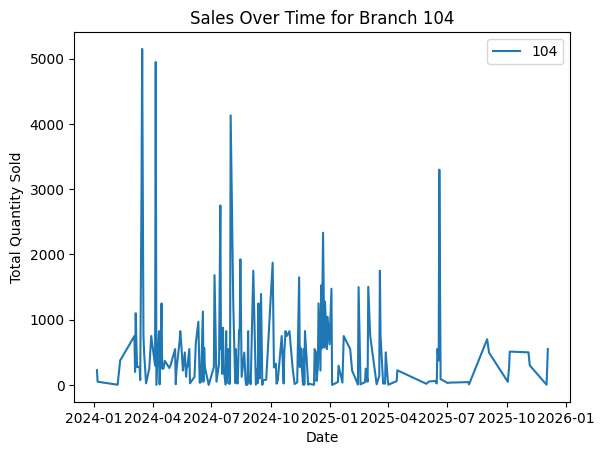

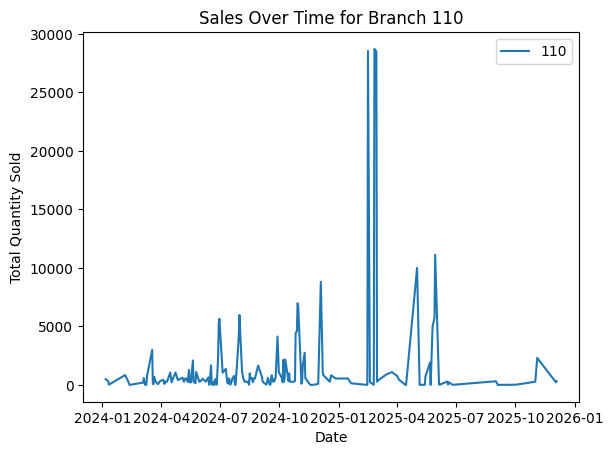

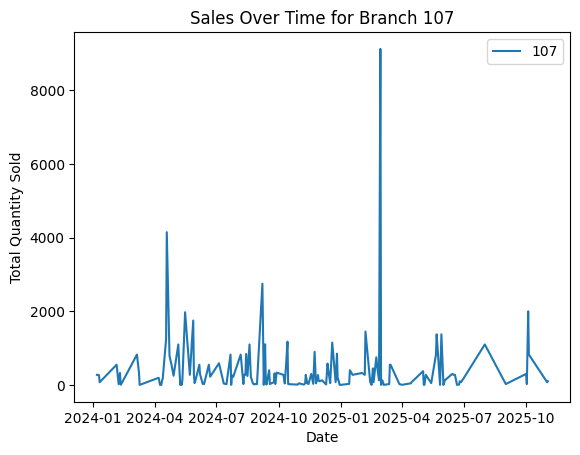

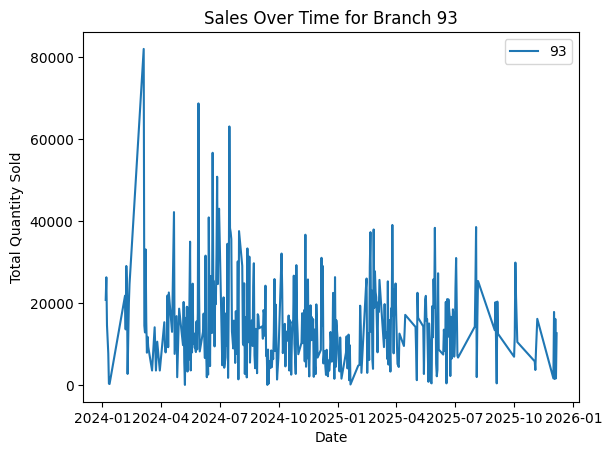

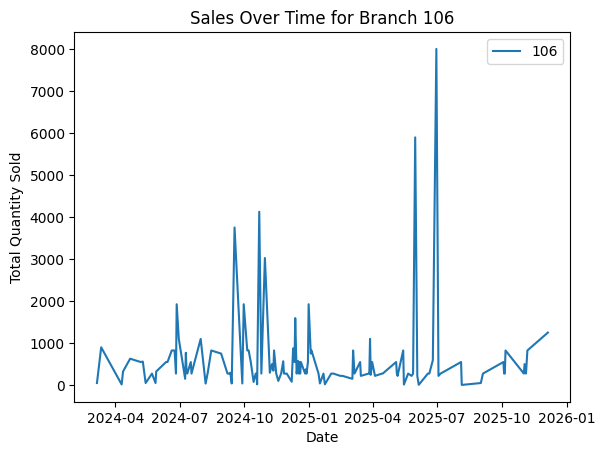

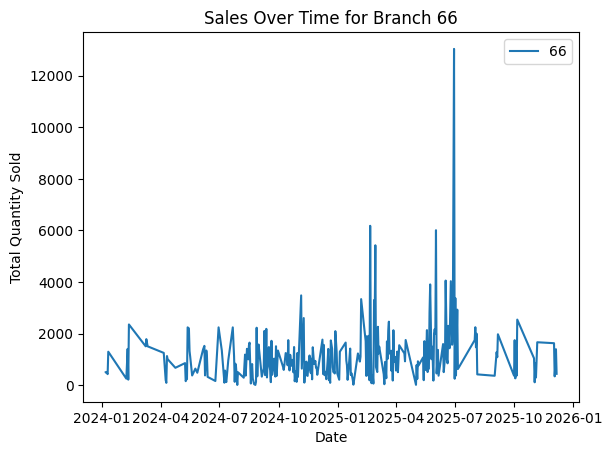

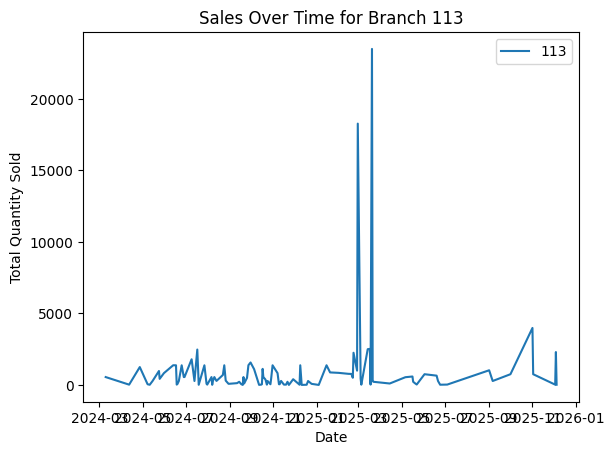

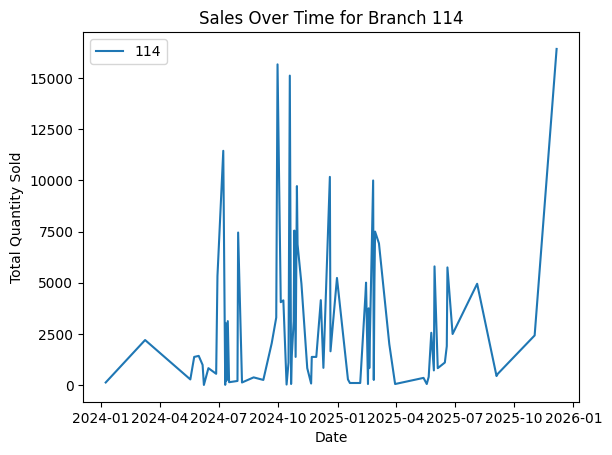

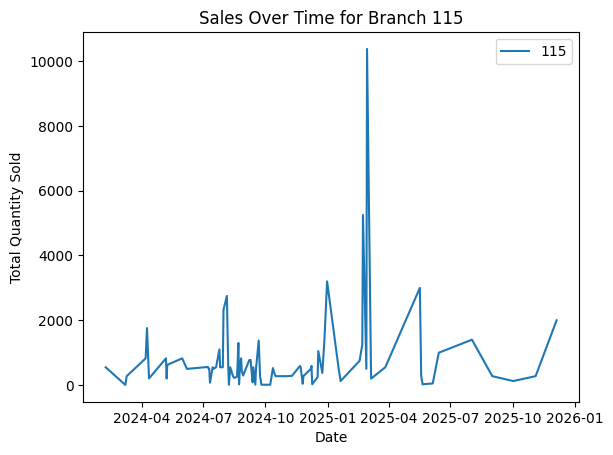

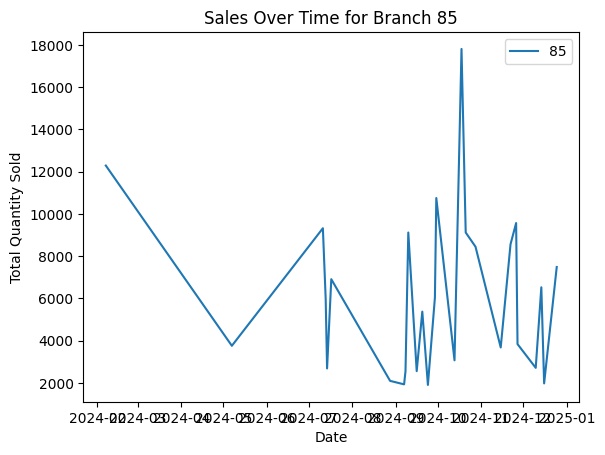

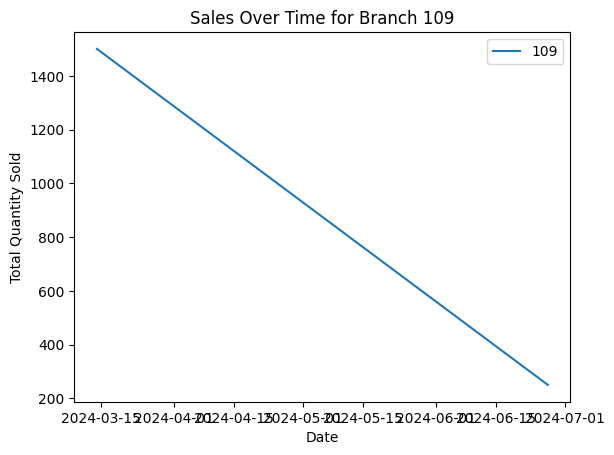

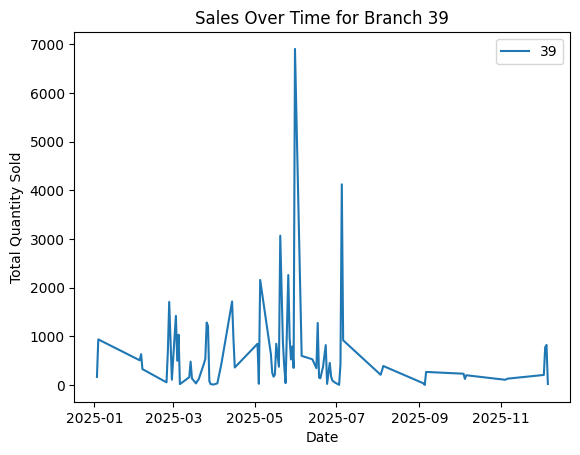

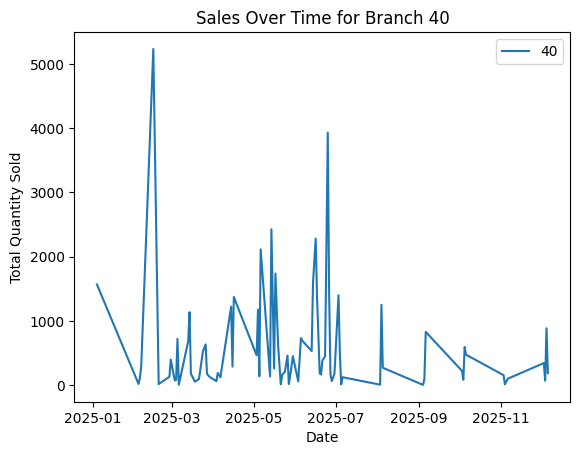

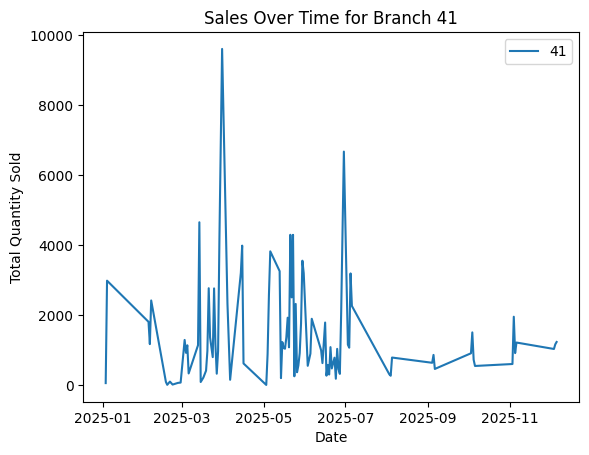

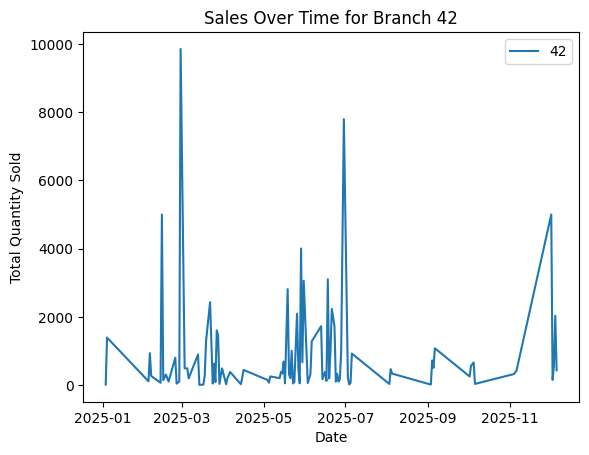

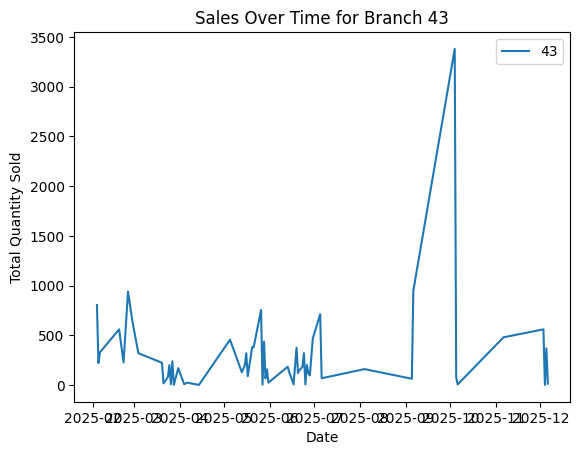

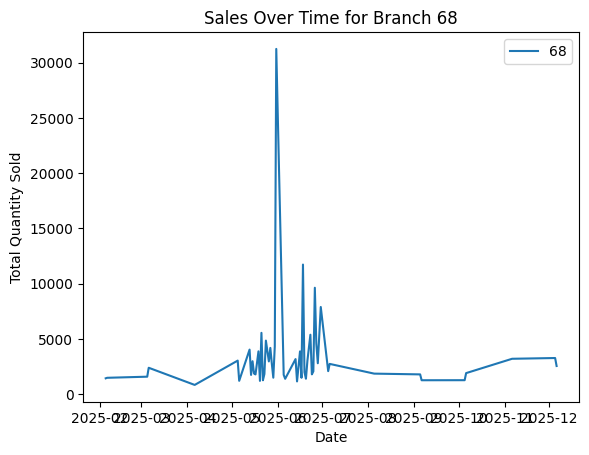

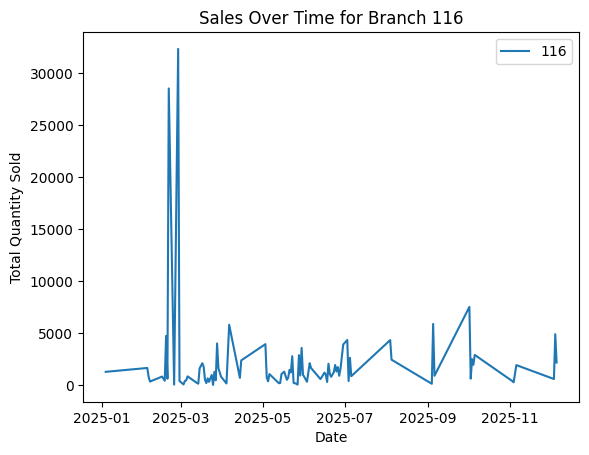

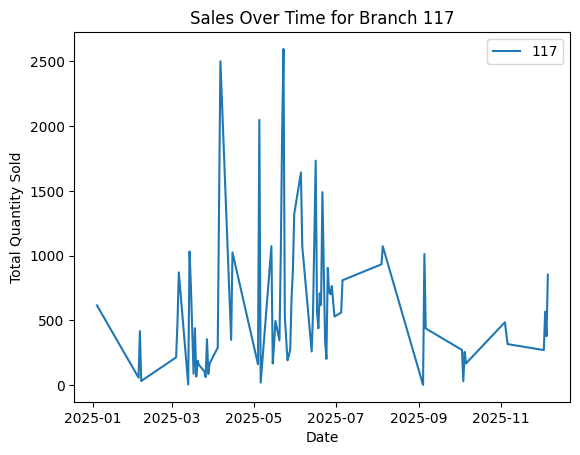

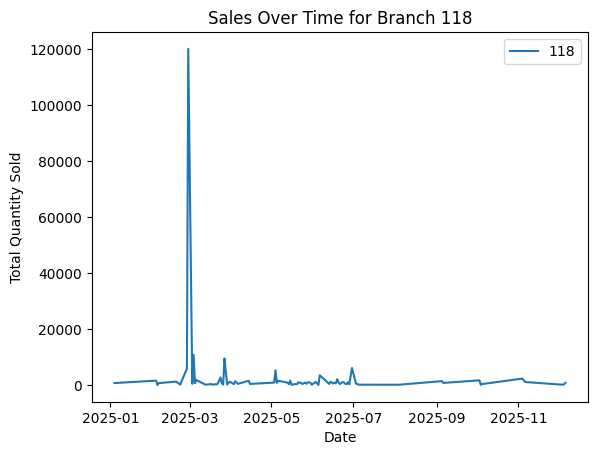

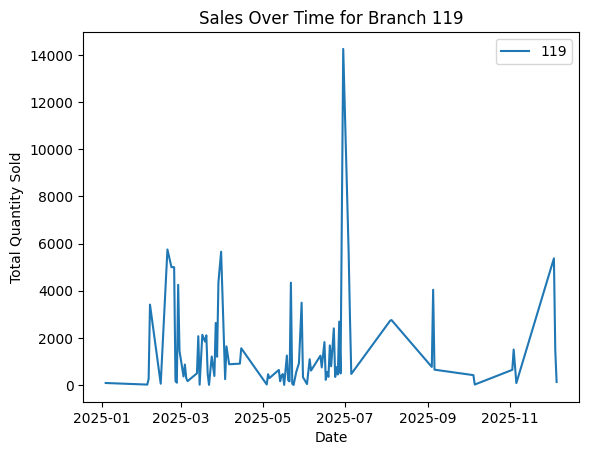

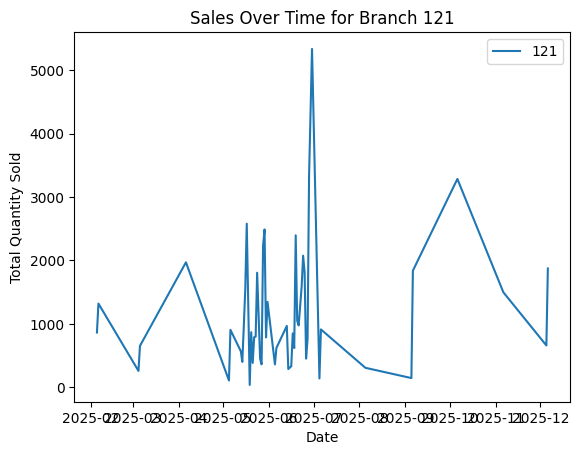

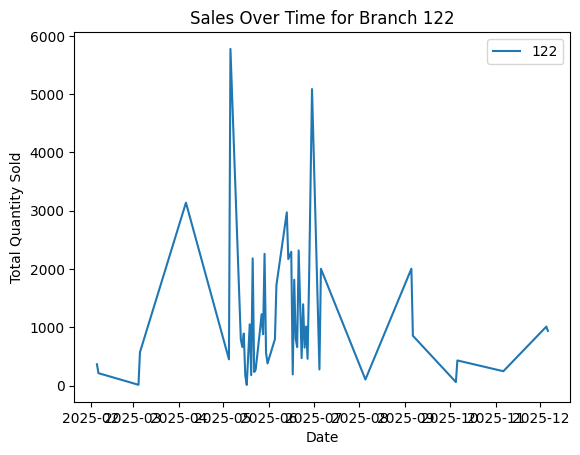

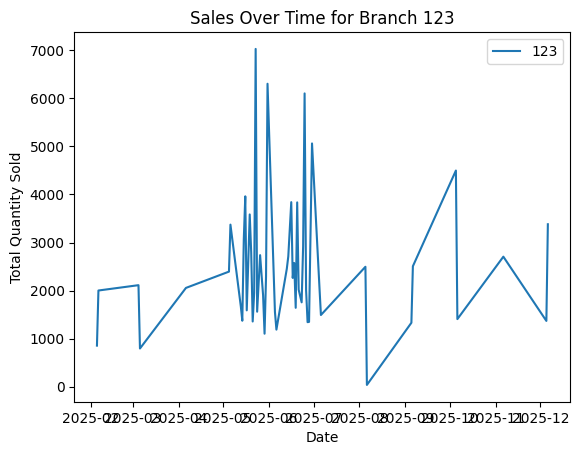

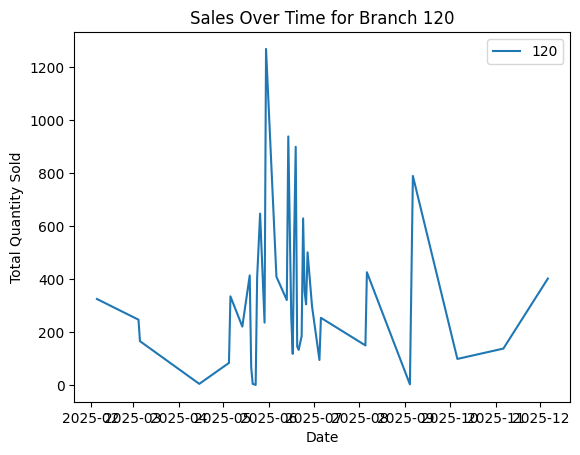

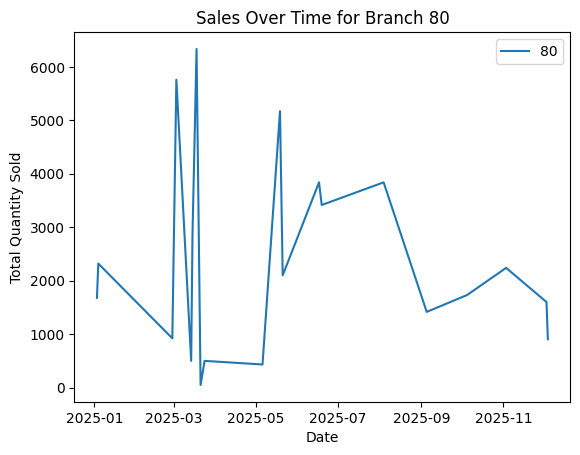

In [9]:
# biểu đồ thời gian số lượng bán hàng theo từng chi nhánh
# Lấy danh sách các chi nhánh duy nhất
branch_codes = df['branch_code'].unique()
# Vẽ biểu đồ cho từng chi nhánh
for branch_code in branch_codes:
    branch_data = df[df['branch_code'] == branch_code]
    sales_over_time = branch_data.groupby('date')['quantity'].sum().reset_index()
    plt.plot(sales_over_time['date'], sales_over_time['quantity'], label=branch_code)
    plt.xlabel('Date')
    plt.ylabel('Total Quantity Sold')
    plt.title(f'Sales Over Time for Branch {branch_code}')
    plt.legend()
    plt.show()
    

### Sales quantity by product

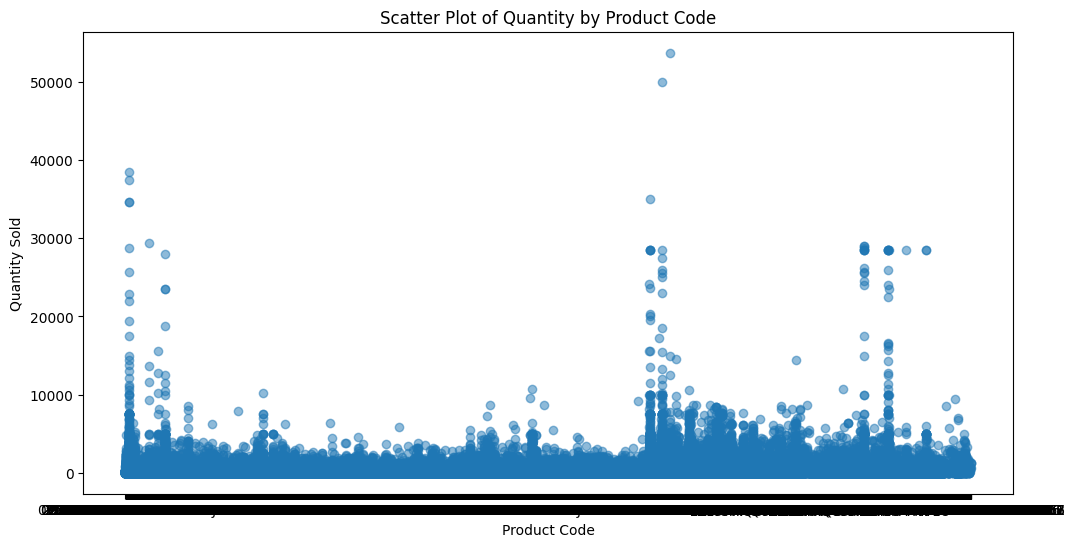

In [ ]:
# Biểu đồ scatter cho Số lượng bán theo Mã hàng
plt.figure(figsize=(12, 6))
plt.scatter(df['product_code'], df['quantity'], alpha=0.5)
plt.title('Scatter Plot of Quantity by Product Code')
plt.xlabel('Product Code')
plt.ylabel('Quantity Sold')
plt.show()

### Total Sales Quantity by Region

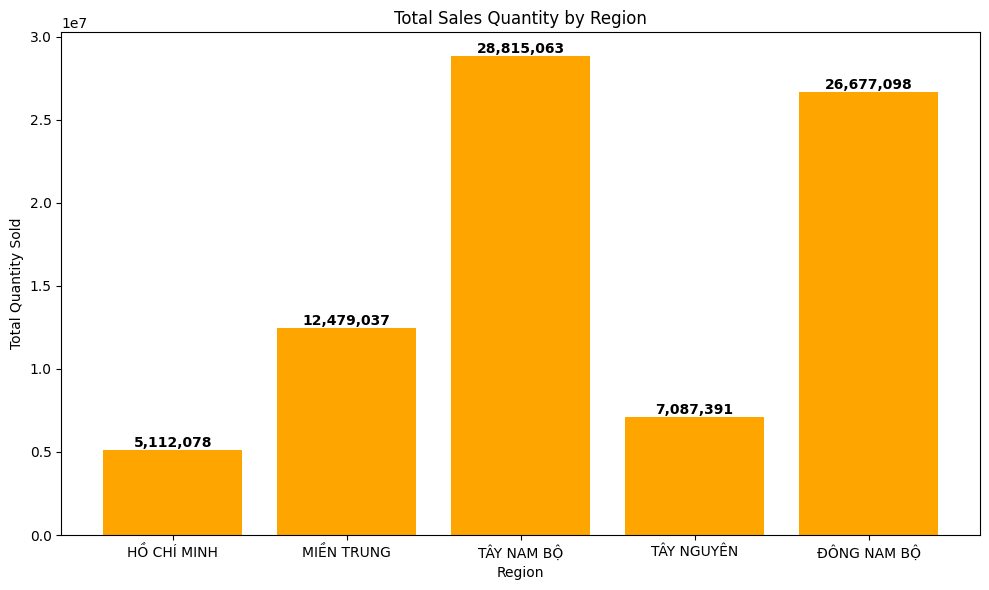

In [ ]:
# số lượng bán theo region
region_sales = df.groupby('region')['quantity'].sum().reset_index()
plt.figure(figsize=(10, 6))
bars = plt.bar(region_sales['region'], region_sales['quantity'], color='orange')

# Hiển thị số trên mỗi cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Total Sales Quantity by Region')
plt.xlabel('Region')
plt.ylabel('Total Quantity Sold')
plt.tight_layout() 
plt.show()

### Pie chart distribution

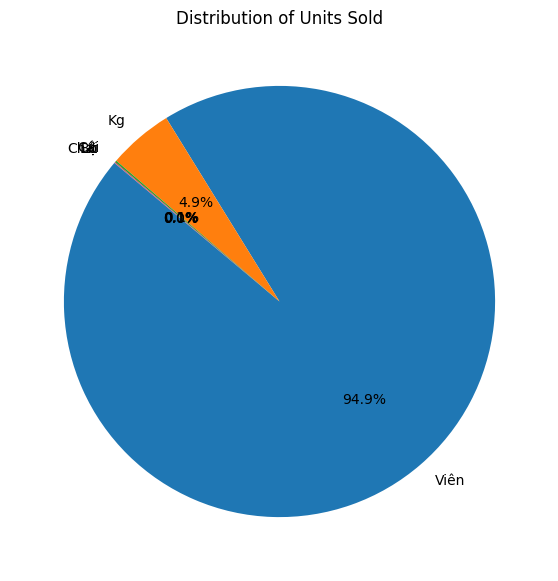

unit
Viên    496356
Kg       25445
Cái        657
Chai       280
Lít        126
Bộ          69
Name: count, dtype: int64


In [37]:
# Pie chart unit distribution
unit_counts = df['unit'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(unit_counts, labels=unit_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Units Sold')
plt.show()

print(unit_counts)

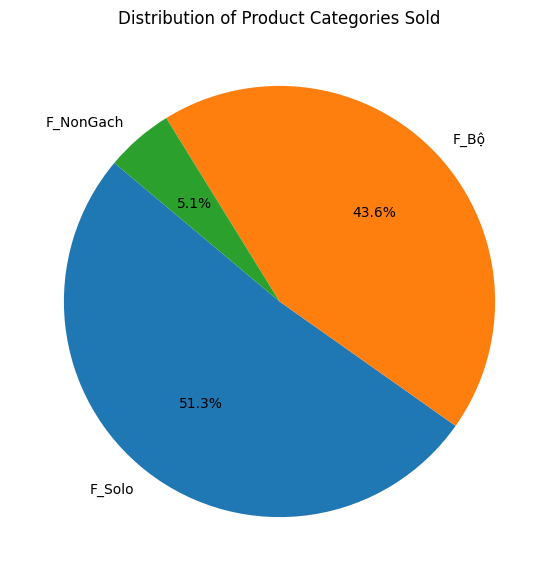

In [38]:
# pie chart category distribution
category_counts = df['category'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Product Categories Sold')
plt.show()



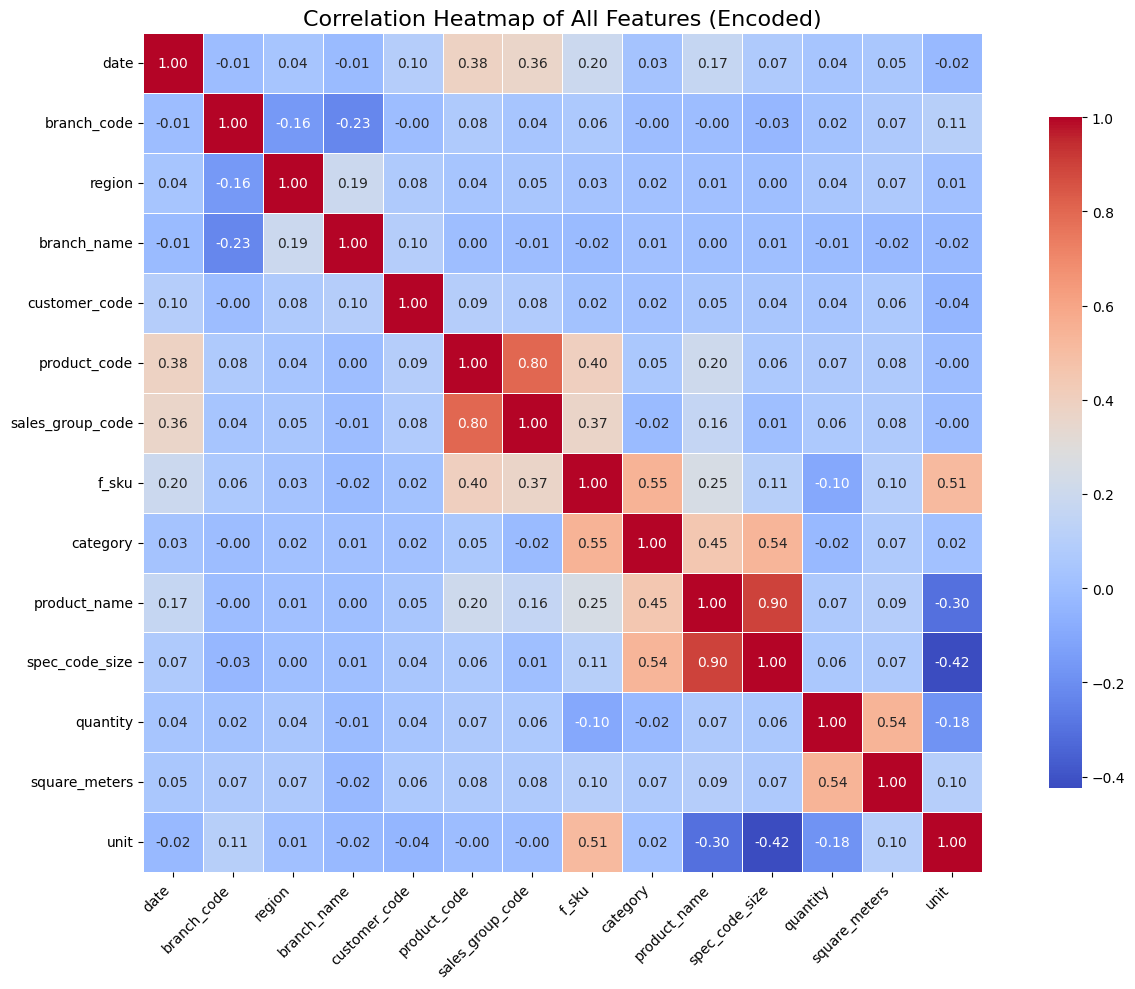

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Tạo bản copy của df để không ảnh hưởng dữ liệu gốc
df_encoded = df.copy()

# Danh sách các cột categorical cần encode
categorical_cols = ['branch_code', 'region', 'branch_name', 'customer_code', 
                    'product_code', 'sales_group_code', 'f_sku', 'category', 
                    'product_name', 'spec_code_size', 'unit']

# Label Encoding cho các cột categorical
le = LabelEncoder()
for col in categorical_cols:
    if col in df_encoded.columns:
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# Xử lý cột date - chuyển thành số (timestamp)
if 'date' in df_encoded.columns:
    df_encoded['date'] = pd.to_datetime(df_encoded['date']).astype('int64') // 10**9  # Convert to Unix timestamp


# plot heatmap

plt.figure(figsize=(14, 10))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of All Features (Encoded)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Split to 4 dataframe

In [7]:
# ===== SALES: giao dịch bán hàng gọn =====
sales_cols = ["date", "branch_code", "customer_code", "product_code", "quantity", "square_meters", "unit"]
sales_cols = [c for c in sales_cols if c in df.columns]
sales = df[sales_cols].copy()

# ===== PRODUCT: danh mục sản phẩm duy nhất =====
product_cols = ["product_code", "f_sku", "category", "product_name", "spec_code_size", "unit"]
product_cols = [c for c in product_cols if c in df.columns]
if "product_code" in product_cols:
    product = df[product_cols].drop_duplicates(subset=["product_code"]).reset_index(drop=True)
else:
    product = df[product_cols].drop_duplicates().reset_index(drop=True)

# ===== BRANCH: danh mục chi nhánh =====
branch_cols = ["branch_code", "region", "branch_name"]
branch_cols = [c for c in branch_cols if c in df.columns]
if "branch_code" in branch_cols:
    branch = df[branch_cols].drop_duplicates(subset=["branch_code"]).reset_index(drop=True)
else:
    branch = df[branch_cols].drop_duplicates().reset_index(drop=True)

# ===== INVENTORY THEO CHI NHÁNH (Cách 1: chỉ cặp đã bán) =====
# Yêu cầu bắt buộc: phải có 3 cột sau trong df
required_cols = {"product_code", "branch_code", "quantity"}
if not required_cols.issubset(df.columns):
    raise ValueError(
        f"Thiếu cột bắt buộc cho Cách 1. Cần có: {sorted(required_cols)}; "
        f"hiện có: {sorted(set(df.columns) & required_cols)}"
    )

# 1) Nhu cầu trung bình theo (product_code, branch_code) CHỈ trên cặp đã từng bán
demand_stats = (
    df.groupby(["product_code", "branch_code"])["quantity"]
      .mean()
      .rename("avg_qty")
      .reset_index()
)

# 2) inventory = đúng các cặp đã bán (KHÔNG tạo cross join)
inventory = demand_stats.copy()

# 3) Tính tồn kho đề xuất (2 tuần); fallback:
#    - nếu avg_qty có -> quantity = round(avg_qty * 14)
#    - nếu thiếu (hiếm, do groupby) -> default 20, tối thiểu 5
inventory["quantity"] = (inventory["avg_qty"] * 14).round()
inventory["quantity"] = inventory["quantity"].fillna(20).clip(lower=5).astype("Int64")
inventory = inventory.drop(columns=["avg_qty"])

# 4) Bổ sung thông tin mô tả sản phẩm
cols_to_merge = ["product_code"]
if "unit" in product.columns:
    cols_to_merge.append("unit")
if "product_name" in product.columns:
    cols_to_merge.append("product_name")

inventory = inventory.merge(product[cols_to_merge], on="product_code", how="left")

# 5) Sắp xếp lại cột theo chuẩn
inv_cols_order = ["product_code", "branch_code", "product_name", "unit", "quantity"]
inventory = inventory[[c for c in inv_cols_order if c in inventory.columns]]

# Chuẩn hóa bảng product cuối cùng
product_cols_order = ["product_code", "product_name", "category", "f_sku", "spec_code_size", "unit"]
product = product[[c for c in product_cols_order if c in product.columns]]

In [10]:
df.isnull().sum()

date                0
branch_code         0
region              0
branch_name         0
customer_code       0
product_code        0
sales_group_code    0
f_sku               0
category            0
product_name        0
spec_code_size      0
quantity            0
square_meters       0
unit                0
dtype: int64

In [12]:
product.head()

product_code                  product_name category  \
0   14.L1.3060.A36410.7   Gạch 30x60 MS A36410 Loại 1     F_Bộ   
1  25.L1.6060.GHP6004.3  Gạch 60x60 MS GHP6004 loại 1   F_Solo   
2     10.L1.3060.4601.8     Gạch 30x60 MS 4601 Loại 1     F_Bộ   
3    14.L1.4080.48922.1    Gạch 40x80 MS 48922 Loại 1     F_Bộ   
4  25.L1.3060.GT3602.50   Gạch 30x60 MS GT3602 Loại 1     F_Bộ   

                    f_sku spec_code_size  unit  
0      36410-36310D-36310           3060  Viên  
1    Solo6060.GraniteBóng           6060  Viên  
2          4601-4602-4603           3060  Viên  
3  48822 - 48922D - 48922          4080A  Viên  
4   GT3602-GTD3602-GT3603           3060  Viên

In [21]:
inventory.head()

product_code  branch_code          product_name unit  quantity
0  00.KCB.100.NS            1  Ke Cân Bằng NS  1 mm   Kg        56
1  00.KCB.100.NS            8  Ke Cân Bằng NS  1 mm   Kg        42
2  00.KCB.100.NS           10  Ke Cân Bằng NS  1 mm   Kg        53
3  00.KCB.100.NS           11  Ke Cân Bằng NS  1 mm   Kg       122
4  00.KCB.100.NS           14  Ke Cân Bằng NS  1 mm   Kg        36

In [24]:
inventory.describe()

branch_code     quantity
count  46296.000000      46296.0
mean      46.282119  2372.503521
std       31.597220  5825.614752
min        0.000000         14.0
25%       16.000000        487.0
50%       52.000000       1055.0
75%       71.000000       2050.0
max      123.000000     248500.0

In [14]:
sales.head()

date  branch_code customer_code          product_code  quantity  \
0 2023-02-01            1       KH07781   14.L1.3060.A36410.7       168   
1 2023-02-01            1       KH08137  25.L1.6060.GHP6004.3         2   
2 2023-02-01            1       KH02768     10.L1.3060.4601.8         8   
3 2023-02-01            1       KH02768    14.L1.4080.48922.1        16   
4 2023-02-01            1       KH08179  25.L1.3060.GT3602.50        68   

   square_meters  unit  
0          30.24  Viên  
1           0.72  Viên  
2           1.44  Viên  
3           5.12  Viên  
4          12.24  Viên

In [15]:
branch.head()

branch_code       region              branch_name
0            1   MIỀN TRUNG     Chi nhánh Đà Nẵng UN
1            2  ĐÔNG NAM BỘ  Chi nhánh Bình Dương UN
2            8  HỒ CHÍ MINH  Chi nhánh Bình Chánh UN
3           10  ĐÔNG NAM BỘ    Chi nhánh Đồng Nai UN
4           11   TÂY NAM BỘ  Chi nhánh Tiền Giang UN

### Convert to csv file

In [8]:
product.to_csv('../init/data/product.csv', index=False)
inventory.to_csv('../init/data/inventory.csv', index=False)
sales.to_csv('../init/data/sales.csv', index=False)
branch.to_csv('../init/data/branch.csv', index=False)